<H1> INSTALLING PACKAGES </H1>

In [2]:
 pip install yfinance --upgrade --no-cache-dir


                                              0.0/65.2 kB ? eta -:--:--
     ---------------------------------------- 65.2/65.2 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.28
    Uninstalling yfinance-0.2.28:
      Successfully uninstalled yfinance-0.2.28


In [3]:
pip install yfinance --upgrade --no-cache-dir --pre

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install yfinance==0.2.28


  Using cached yfinance-0.2.28-py2.py3-none-any.whl (65 kB)
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.29
    Uninstalling yfinance-0.2.29:
      Successfully uninstalled yfinance-0.2.29


<H1> GETTING THE FUNDAMENTALS OF A COMPANY </H1>

In [212]:
import yfinance as yf

def market_analysis(stock):
    stock = yf.Ticker(stock)
    def get_fundamentals():
        string=f"""marketcap={stock.info["marketCap"]} \nfiftytwoweekhigh={stock.info["fiftyTwoWeekHigh"]}  \nreturnOnEquity={stock.info['returnOnEquity']}    \ndebtToEquity={stock.info['debtToEquity']}  \ntrailingEps={stock.info['trailingEps']} \nforwardEps={stock.info['forwardEps']} \ndividendYield={stock.info['dividendYield']} \nbookValue={stock.info['bookValue']}"""
        return string 
    def income_stat():
        return  stock.income_stmt.loc[['EBITDA','Total Expenses','Net Income','Gross Profit','Total Revenue']]
    def  balance_sheet():
        return stock.balance_sheet.loc[['Current Assets','Total Non Current Assets','Total Assets','Current Liabilities','Current Debt','Total Debt','Working Capital','Stockholders Equity']]
    def cashflow():
        return  stock.cashflow.loc[['Changes In Cash','Change In Working Capital','Capital Expenditure','Free Cash Flow']]
    print(get_fundamentals())
    print("------------------------------------------x----------------------------------x---------------------------------------")
    print(income_stat())
    print("------------------------------------------x----------------------------------x---------------------------------------")
    print(balance_sheet())  
    print("------------------------------------------x----------------------------------x---------------------------------------")
    print(cashflow())

    
temp=market_analysis("AAPL")


marketcap=2732701515776 
fiftytwoweekhigh=198.23  
returnOnEquity=1.60093    
debtToEquity=181.305  
trailingEps=5.97 
forwardEps=6.59 
dividendYield=0.0055 
bookValue=3.852
------------------------------------------x----------------------------------x---------------------------------------
                    2022-09-30      2021-09-30      2020-09-30      2019-09-30
EBITDA          130541000000.0  120233000000.0   77344000000.0   76477000000.0
Total Expenses  274891000000.0  256868000000.0  208227000000.0  196244000000.0
Net Income       99803000000.0   94680000000.0   57411000000.0   55256000000.0
Gross Profit    170782000000.0  152836000000.0  104956000000.0   98392000000.0
Total Revenue   394328000000.0  365817000000.0  274515000000.0  260174000000.0
------------------------------------------x----------------------------------x---------------------------------------
                              2022-09-30      2021-09-30      2020-09-30  \
Current Assets            135405000000.0

<H1> MOMENTUM TRADING </H1>

[*********************100%%**********************]  1 of 1 completed


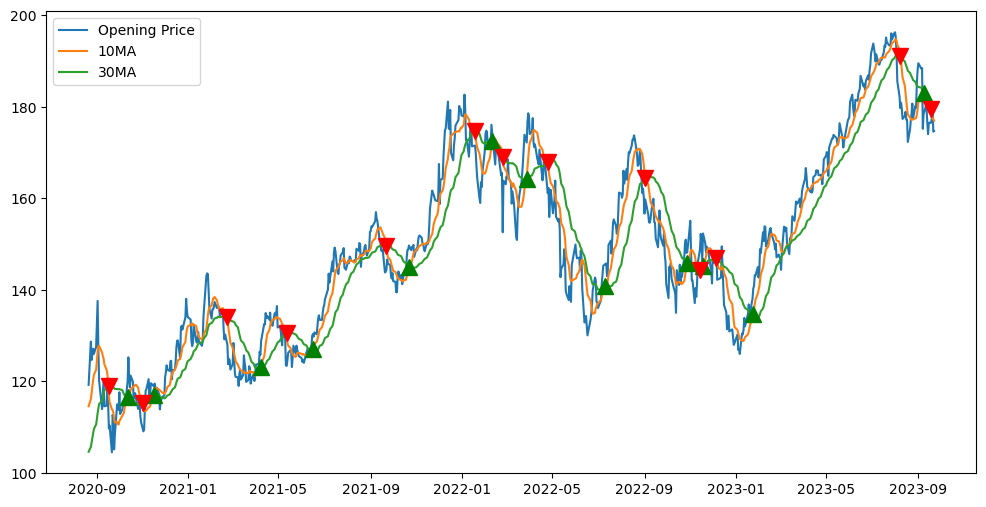

------------------------------------------x----------------------------------x---------------------------------------
buy and hold return            :0.47782702203464744
return through momentum trading:0.14958762310430274
------------------------------------------x----------------------------------x---------------------------------------


In [254]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

def mommentum_trading(stock):
    df=yf.download(stock ,start='2020-01-01')
    df['day']=np.arange(1,len(df['Open'])+1,1)
    # def fill_moving_avg(df,temp,i):
    #     sum=0
    #     counter=0
    #     for price in df['Open']:
    #         if counter >= i :
    #             sum+=price
    #             sum-=df['Open'][counter-i]
    #             temp[counter]=(sum/i)
    #         else:
    #             sum+=price
    #             temp[counter]=np.nan
    #     counter+=1
    # print(df)
    df['10ma']=df['Open'].rolling(10).mean()
    df['30ma']=df['Open'].rolling(30).mean()
 
    df.dropna(inplace=True)
    # print(df)
    df['signal'] = np.where(df['10ma'] > df['30ma'], 1, 0)
    df['signal'] = np.where(df['10ma'] < df['30ma'], -1, df['signal'])
    # df.dropna(inplace=True)
    df.drop(columns=['Adj Close','Volume'],inplace=True)
    df['entry']=df['signal'].diff()
    # df.dropna(inplace=True)
    df['return'] =np.log( df['Close']).diff()
    df['system_return'] = df['signal'] * df['return']
    df=df.iloc[132:]
    # print(df)
    plt.figure(figsize=(12, 6))
    plt.plot(df['Open'], label='Opening Price')
    plt.plot(df['10ma'],label='10MA')
    plt.plot(df['30ma'],label='30MA')
    plt.plot(df['10ma'][df.entry == 2], '^',color = 'g', markersize = 12)
    plt.plot(df['30ma'][df.entry == -2],'v',color = 'r', markersize = 12)
    plt.legend()
    plt.show()
    print("------------------------------------------x----------------------------------x---------------------------------------")
    print(f"buy and hold return            :{np.exp(df['return']).cumprod()[-1]-1}")
    print(f"return through momentum trading:{np.exp(df['system_return']).cumprod()[-1]-1}")
    print("------------------------------------------x----------------------------------x---------------------------------------")
    
    
mommentum_trading("AAPL")

<H1> TRADING USING LINEAR REGRESSION</H1>
<H3> WE ARE PREDICTING CLOSING PRICE OF A STOCK WITH OPENING PRICE(t) ,ADJUSTED CLOSING PRICE(t-1) ,HIGH(t-1) ,LOW(t-1) ,VOLUME(t-1)</H3>
<H3> IF THE PREDICTED CLOSING PRICE IS MORE THAN OPENING THEN WE TAKE A TRADE</H3>

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=yf.download("AAPL" ,start='2010-01-01')

df['High']=df['High'].shift(1)
df['Low']=df['Low'].shift(1)
df['Adj Close']=df['Adj Close'].shift(1)
df['Volume']=df['Volume'].shift(1)

df=df.iloc[1:-1]
# print(df)
x = df[['Open','High','Low','Adj Close','Volume']]
y = df['Close']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)
regression = LinearRegression()
regression.fit(train_x, train_y)
# print("regression coefficient",regression.coef_)


predicted=regression.predict(test_x)
newdf=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted,'Open_Price':test_x['Open']})

newdf['trade_taken']=np.where(newdf['Predicted_Price']>newdf['Open_Price'] ,True,False)
newdf['system_result']=np.where(newdf['Actual_Price']>newdf['Open_Price'] ,True,False)
print("------------------------------------------x----------------------------------x---------------------------------------")
print("total numbe of trade",newdf['trade_taken'].count())
print("trade taken",newdf[newdf['trade_taken']==True]['trade_taken'].count())
cond1=newdf['trade_taken']==True
cond2=newdf['system_result']==True
print("sucessful trade taken",newdf[cond2 & cond1]['system_result'].count())
print("win percentage :",newdf[cond2 & cond1]['system_result'].count() *100 /newdf[newdf['trade_taken']==True]['trade_taken'].count())
print("------------------------------------------x----------------------------------x---------------------------------------")
# newdf


[*********************100%%**********************]  1 of 1 completed
------------------------------------------x----------------------------------x---------------------------------------
total numbe of trade 518
trade taken 346
sucessful trade taken 184
win percentage : 53.179190751445084
------------------------------------------x----------------------------------x---------------------------------------
